In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from matplotlib.ticker import MaxNLocator

# Time plot

In [16]:
var4d_time_df = pd.read_csv('./out/pyqg_jax/pyqg_4dvar_results_test_v2_sysdimxy_all_fullyear.csv')
bp_time_df = pd.read_csv('./out/pyqg_jax/pyqg_4dvar_results_test_v5_3epochs_dim32fullyear.csv')
bp_time_df_10epochs = pd.read_csv('./out/pyqg_jax/pyqg_4dvar_results_test_v5_10epochs_dim32fullyear.csv')
bp_time_df_25epochs = pd.read_csv('./out/pyqg_jax/pyqg_4dvar_results_test_v5_25epochs_dim32fullyear.csv')
baserun_time_df = pd.read_csv('./out/pyqg_jax/pyqg_baserun_results_test_v1.csv')

In [17]:
var4d_time_df['system_dim'] = 2*var4d_time_df['system_dim_xy']**2
bp_time_df['system_dim'] = 2*bp_time_df['system_dim_xy']**2
bp_time_df_10epochs['system_dim'] = 2*bp_time_df_10epochs['system_dim_xy']**2
bp_time_df_25epochs['system_dim'] = 2*bp_time_df_25epochs['system_dim_xy']**2

baserun_time_df['system_dim'] = 2*baserun_time_df['system_dim_xy']**2


In [18]:
# Add in tuning time
bp_tuning_df = pd.read_csv('./pyqg_jax_raytune_sgdopt_werrors_v10_3epochs_system_dims_16_20_24_32.csv')
bp_tuning_df_10epochs = pd.read_csv('./pyqg_jax_raytune_sgdopt_werrors_v10_10epochs_system_dims_16_20_24_32.csv')
bp_tuning_df_25epochs = pd.read_csv('./pyqg_jax_raytune_sgdopt_werrors_v10_25epochs_system_dims_16_20_24_32.csv')

tuning_times = bp_tuning_df[['system_dim_xy', 'total_tune_time']].groupby('system_dim_xy').first()
tuning_times_10epochs = bp_tuning_df_10epochs[['system_dim_xy', 'total_tune_time']].groupby('system_dim_xy').first()
tuning_times_25epochs = bp_tuning_df_25epochs[['system_dim_xy', 'total_tune_time']].groupby('system_dim_xy').first()

bp_time_df = bp_time_df.merge(tuning_times, on='system_dim_xy')
bp_time_df_10epochs = bp_time_df_10epochs.merge(tuning_times_10epochs, on='system_dim_xy')
bp_time_df_25epochs = bp_time_df_25epochs.merge(tuning_times_25epochs, on='system_dim_xy')

bp_time_df['total_time'] = bp_time_df['total_tune_time'] + bp_time_df['da_time']
bp_time_df_10epochs['total_time'] = bp_time_df_10epochs['total_tune_time'] + bp_time_df_10epochs['da_time']
bp_time_df_25epochs['total_time'] = bp_time_df_25epochs['total_tune_time'] + bp_time_df_25epochs['da_time']

In [19]:
var4d_time_df.set_index('system_dim', inplace=True)
bp_time_df.set_index('system_dim', inplace=True)
bp_time_df_10epochs.set_index('system_dim', inplace=True)
bp_time_df_25epochs.set_index('system_dim', inplace=True)

baserun_time_df.set_index('system_dim', inplace=True)

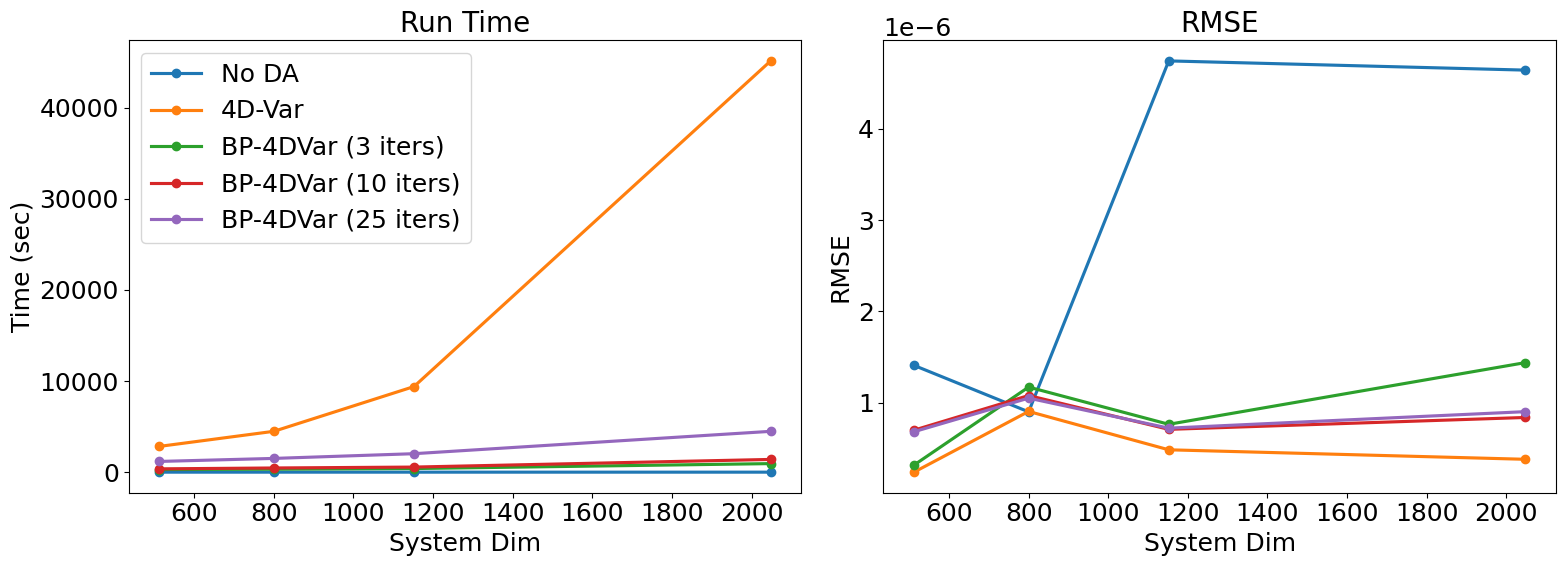

In [21]:
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

baserun_time_df['da_time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)
var4d_time_df['da_time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)
bp_time_df['total_time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)
bp_time_df_10epochs['total_time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)
bp_time_df_25epochs['total_time'].plot(ax=axs[0], style='.-', markersize=12, lw=2.25)


baserun_time_df['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
var4d_time_df['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
bp_time_df['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
bp_time_df_10epochs['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)
bp_time_df_25epochs['rmse'].plot(ax=axs[1], style='.-', markersize=12, lw=2.25)



axs[0].set_ylabel('Time (sec)')
axs[0].legend(labels=['No DA', '4D-Var', 'BP-4DVar (3 iters)', 'BP-4DVar (10 iters)', 'BP-4DVar (25 iters)'])
axs[1].set_ylabel('RMSE')
axs[0].set_xlabel('System Dim')
axs[1].set_xlabel('System Dim')
axs[0].set_title('Run Time', size=20)
axs[1].set_title('RMSE', size=20)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()

In [20]:
var4d_time_df['da_time']/bp_time_df['total_time']

system_dim
512      9.642746
800     13.715404
1152    23.534294
2048    46.487799
dtype: float64